In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

C:\Users\Anna\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# reading the data
data = pd.read_excel("Varks.am.xlsx")
data.head()

,Satisfaction,Relationship,Communication,Resolved conflics,Favoritism,Fair shared info,Matching skills,New job,Good treatment,Excellent customer service.,Salary,Work-life balance
0,1,2,3,2,2,3,2,0,3,3,3,2
1,0,2,2,1,1,0,2,2,0,0,1,1
2,1,3,3,2,2,2,2,0,2,3,2,2
3,0,2,2,2,2,2,1,1,2,2,1,2
4,0,3,3,3,1,2,1,2,1,0,2,1


In [3]:
# creating correlation matrix
data.corr()

,Satisfaction,Relationship,Communication,Resolved conflics,Favoritism,Fair shared info,Matching skills,New job,Good treatment,Excellent customer service.,Salary,Work-life balance
Satisfaction,1.000000,0.224286,0.211335,0.361592,0.061749,0.336457,0.249095,-0.417001,0.623698,0.519598,0.457713,0.273622
Relationship,0.224286,1.000000,0.484166,0.468112,0.116211,0.392945,0.205206,-0.120866,0.254045,0.268995,0.198111,0.038224
Communication,0.211335,0.484166,1.000000,0.506502,0.266859,0.554950,0.081827,-0.186881,0.302881,0.337565,0.210829,0.214324
Resolved conflics,0.361592,0.468112,0.506502,1.000000,0.181216,0.469000,-0.031331,-0.187256,0.502855,0.451065,0.361768,0.295683
Favoritism,0.061749,0.116211,0.266859,0.181216,1.000000,0.326646,0.127773,-0.032742,0.156580,0.184600,0.079616,0.281739
Fair shared info,0.336457,0.392945,0.554950,0.469000,0.326646,1.000000,0.175430,-0.230965,0.409169,0.555149,0.261639,0.149776
Matching skills,0.249095,0.205206,0.081827,-0.031331,0.127773,0.175430,1.000000,-0.152352,0.189035,0.086101,0.087251,0.085644
New job,-0.417001,-0.120866,-0.186881,-0.187256,-0.032742,-0.230965,-0.152352,1.000000,-0.459411,-0.409054,-0.285106,-0.295790
Good treatment,0.623698,0.254045,0.302881,0.502855,0.156580,0.409169,0.189035,-0.459411,1.000000,0.564011,0.467364,0.257987
Excellent customer service.,0.519598,0.268995,0.337565,0.451065,0.184600,0.555149,0.086101,-0.409054,0.564011,1.000000,0.410160,0.287238


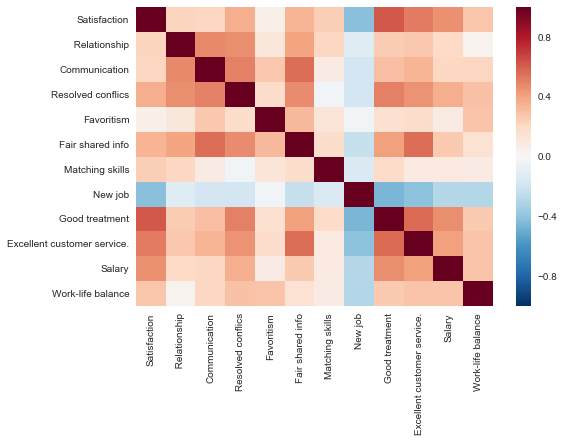

In [4]:
# plotting the correlation matrix
sns.heatmap(data.corr())
plt.show()

In [5]:
# checking the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
Satisfaction                   120 non-null int64
 Relationship                  120 non-null int64
Communication                  120 non-null int64
Resolved conflics              120 non-null int64
Favoritism                     120 non-null int64
Fair shared info               120 non-null int64
Matching skills                120 non-null int64
New job                        120 non-null int64
Good treatment                 120 non-null int64
Excellent customer service.    120 non-null int64
Salary                         120 non-null int64
Work-life balance              120 non-null int64
dtypes: int64(12)
memory usage: 11.3 KB


In [6]:
# descriptive analytics
data.describe()

,Satisfaction,Relationship,Communication,Resolved conflics,Favoritism,Fair shared info,Matching skills,New job,Good treatment,Excellent customer service.,Salary,Work-life balance
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.891667,2.525000,2.433333,2.125000,1.825000,2.208333,2.191667,0.941667,1.991667,2.100000,1.975000,1.750000
std,0.312104,0.579227,0.590304,0.716698,0.752168,0.696882,0.701689,0.759210,0.772379,0.792825,0.627955,0.664211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000
max,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [7]:
data["Satisfaction"].value_counts()/len(data)*100

1    89.166667
0    10.833333
Name: Satisfaction, dtype: float64

In [9]:
#importing the model
from sklearn.tree import DecisionTreeClassifier

In [11]:
# initializing the model
model = DecisionTreeClassifier(random_state=42)

In [12]:
# setting the inputs and output
inputs = data.iloc[:,1:]
output = data["Satisfaction"]

In [13]:
#fitting the model
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [14]:
# checking the accuracy
model.score(inputs,output)*100

100.0

In [15]:
# importing the lib for exporting tree visualization code
from sklearn.tree import export_graphviz

In [16]:
# exporting the tree graph and then visualizing in webgraphviz.com
export_graphviz(model,"tree.dot")

In [17]:
# building new model with a max_depth specification
modelFit = DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
train, test = train_test_split(data,test_size=0.3)

In [19]:
len(test)

36

In [20]:
train, test = train_test_split(data,train_size=0.7)

In [21]:
len(train)

84

In [22]:
model_A = DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.75)

In [24]:
model_A.fit(inputs_train,output_train)
model_A.score(inputs_test,output_test)*100

93.333333333333329

In [25]:
export_graphviz(model_A,"tree_.dot")

In [26]:
# building a dataframe with importances
df = pd.DataFrame(index=list(data)[1:],data=model.feature_importances_)
df

,0
Relationship,0.098511
Communication,0.021567
Resolved conflics,0.011503
Favoritism,0.000000
Fair shared info,0.000000
Matching skills,0.075485
New job,0.043134
Good treatment,0.534621
Excellent customer service.,0.092089
Salary,0.047092


In [27]:
# sorting values by the only column we have in a descending order
df.sort_values(by=0, ascending=False)

,0
Good treatment,0.534621
Relationship,0.098511
Excellent customer service.,0.092089
Work-life balance,0.075999
Matching skills,0.075485
Salary,0.047092
New job,0.043134
Communication,0.021567
Resolved conflics,0.011503
Favoritism,0.000000
